<a href="https://colab.research.google.com/github/tdisheng/Personal-Page/blob/master/Foundations%20of%20Deep%20Learning/Getting_more_advanced_code_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Testing for GPU

To Test if you have GPU set up

Run the Cell below

if no GPU is found press Runtime (in the menu at the top) and choose "Change Runtime Type" to GPU
 

In [ ]:
# check nvidia card
!nvidia-smi

Thu Apr  8 07:32:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    74W / 149W |    184MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 2. Getting  more advanced


In [ ]:
# import what we will use here
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
import numpy as np
from tensorflow.keras.utils import plot_model


In [ ]:
print(tf.keras.__version__)
print(tf.__version__)

2.4.0
2.4.1


### Lets import our dataset

In [ ]:
# load up our data
from tensorflow.python.keras.datasets import mnist

(x_train, y_train),(x_test,y_test) = mnist.load_data()

**Preprocessing**

In [ ]:
# reshape input to a vector
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# convert to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#standardize 0-1
x_train /= 255
x_test /= 255

# let's print out our tensor shapes
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [ ]:
# make one hot labels

#number of classes
n_classes = 10

# convert class vectors to binary One Hot Encoded
y_train = tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=n_classes)


In [ ]:
# lets check out labels
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Setting up our Network Hyper Parameters

In [ ]:
# Training Parameters for basic MNIST
learning_rate = 0.001
training_epochs = 10
batch_size = 128

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 128 # 2nd layer number of neurons
n_hidden_3 = 64 # 3rd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

### This time we are going to make a functional model instead of a sequential model

In [ ]:
#make the model
Inp = Input(shape=(n_input,), name='Input')
x = Dense(n_hidden_1, activation='relu', name='Dense_01')(Inp)
x = Dense(n_hidden_2, activation='relu', name='Dense_02')(x)
x = Dense(n_hidden_3, activation='relu', name='Dense_03')(x)
x = Dense(32, activation='relu', name='Dense_04')(x)
output = Dense(n_classes, activation='softmax', name='output')(x)

In [ ]:
# Assemble the model - This creates a model that includes our input, 4 dense hidden layers, output layer

model = Model(Inp,output,name='Functional_01')

In [ ]:
# take a look at our model
model.summary()

Model: "Functional_01"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
Dense_01 (Dense)             (None, 256)               200960    
_________________________________________________________________
Dense_02 (Dense)             (None, 128)               32896     
_________________________________________________________________
Dense_03 (Dense)             (None, 64)                8256      
_________________________________________________________________
Dense_04 (Dense)             (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_______________________________________________

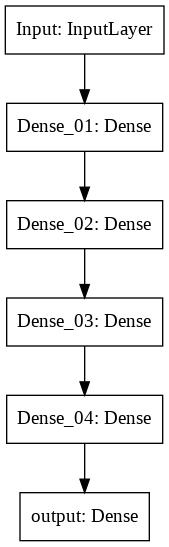

In [ ]:
# plot the model out
plot_model(model, to_file="new_model.png")

In [ ]:
# create an optimizer SGD
opt = SGD(learning_rate=learning_rate)

In [ ]:
# compile the model
model.compile(optimizer=opt, # 'SGD'
              loss=tf.keras.losses.categorical_crossentropy, # 'categorical_crossentropy'
              metrics=['accuracy'])

## Training

In [ ]:
# train the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=40,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3009 - accuracy: 0.1105 - val_loss: 2.2193 - val_accuracy: 0.2555
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 2.1928 - accuracy: 0.2836 - val_loss: 2.0952 - val_accuracy: 0.3919
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 2.0569 - accuracy: 0.4110 - val_loss: 1.8995 - val_accuracy: 0.5355
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 1.8419 - accuracy: 0.5499 - val_loss: 1.6146 - val_accuracy: 0.6214
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 1.5467 - accuracy: 0.6337 - val_loss: 1.3133 - val_accuracy: 0.6896
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 1.2525 - accuracy: 0.7034 - val_loss: 1.0747 - val_accuracy: 0.7386
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 1.0372 - accuracy: 0.7453 - val_loss: 0.9085 - val_accuracy: 0.7668
Epoch 

In [ ]:
history.history

{'accuracy': [0.15533334016799927,
  0.3181000053882599,
  0.44670000672340393,
  0.5722500085830688,
  0.6519500017166138,
  0.7126500010490417,
  0.7511166930198669,
  0.7785333395004272,
  0.8023666739463806,
  0.8203333616256714,
  0.8349000215530396,
  0.846750020980835,
  0.8565499782562256,
  0.864716649055481,
  0.8716333508491516,
  0.8773000240325928,
  0.8823000192642212,
  0.8861500024795532,
  0.8892666697502136,
  0.8918499946594238,
  0.8950333595275879,
  0.8969333171844482,
  0.899649977684021,
  0.901533305644989,
  0.9034333229064941,
  0.9053166508674622,
  0.9064333438873291,
  0.9082666635513306,
  0.9092000126838684,
  0.911050021648407,
  0.9120833277702332,
  0.9130833148956299,
  0.9146000146865845,
  0.9155333042144775,
  0.916533350944519,
  0.9178833365440369,
  0.9186000227928162,
  0.9196333289146423,
  0.9204000234603882,
  0.9217833280563354],
 'loss': [2.2721407413482666,
  2.1636717319488525,
  2.0102806091308594,
  1.771324634552002,
  1.470917224884

In [ ]:
#now let's plot it out

def plot_train(hist):
    h = hist.history
    if 'accuracy' in h:
        meas='accuracy'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    

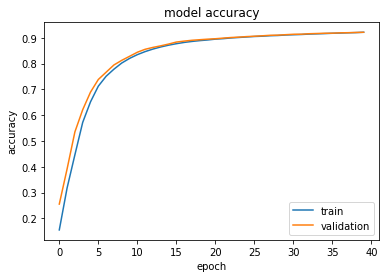

In [ ]:
plot_train(history)

In [ ]:
# now train some more
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2697 - accuracy: 0.9221 - val_loss: 0.2596 - val_accuracy: 0.9235
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2667 - accuracy: 0.9233 - val_loss: 0.2569 - val_accuracy: 0.9239
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2636 - accuracy: 0.9245 - val_loss: 0.2539 - val_accuracy: 0.9237
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2607 - accuracy: 0.9247 - val_loss: 0.2520 - val_accuracy: 0.9233
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2579 - accuracy: 0.9258 - val_loss: 0.2499 - val_accuracy: 0.9245
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2550 - accuracy: 0.9267 - val_loss: 0.2465 - val_accuracy: 0.9259
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2524 - accuracy: 0.9269 - val_loss: 0.2443 - val_accuracy: 0.9264
Epoch 

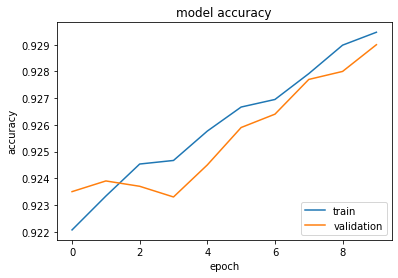

In [ ]:
plot_train(history)

## Dropout


Now lets add dropout

Dropout(0.3) = randomly dropout 30% of the units each pass through

In [ ]:
# build a model with dropout
Inp = Input(shape=(n_input,), name='Input')
x = Dense(n_hidden_1, activation='relu', name='Dense_01')(Inp)
x = Dropout(0.3)(x)
x = Dense(n_hidden_2, activation='relu', name='Dense_02')(x)
x = Dropout(0.3)(x)
x = Dense(n_hidden_3, activation='relu', name='Dense_03')(x)
x = Dropout(0.3)(x)
output = Dense(n_classes, activation='softmax', name='output')(x)

In [ ]:
model = Model(Inp, output, name='With_Dropout')

In [ ]:
model.summary()

Model: "With_Dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
Dense_01 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
Dense_02 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
Dense_03 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 2.3537 - accuracy: 0.1072 - val_loss: 2.2043 - val_accuracy: 0.2880
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 2.2338 - accuracy: 0.1786 - val_loss: 2.0939 - val_accuracy: 0.4873
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 2.1416 - accuracy: 0.2511 - val_loss: 1.9462 - val_accuracy: 0.6105
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 2.0232 - accuracy: 0.3313 - val_loss: 1.7649 - val_accuracy: 0.6779
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 1.8897 - accuracy: 0.3982 - val_loss: 1.5609 - val_accuracy: 0.7161
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 1.7420 - accuracy: 0.4513 - val_loss: 1.3586 - val_accuracy: 0.7489
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 1.5943 - accuracy: 0.5035 - val_loss: 1.1788 - val_accuracy: 0.7728
Epoch 

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6303 - accuracy: 0.8053 - val_loss: 0.3725 - val_accuracy: 0.9002
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6178 - accuracy: 0.8096 - val_loss: 0.3658 - val_accuracy: 0.9018
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6073 - accuracy: 0.8145 - val_loss: 0.3603 - val_accuracy: 0.9032
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6000 - accuracy: 0.8163 - val_loss: 0.3551 - val_accuracy: 0.9037
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5910 - accuracy: 0.8199 - val_loss: 0.3492 - val_accuracy: 0.9040
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5798 - accuracy: 0.8234 - val_loss: 0.3440 - val_accuracy: 0.9049
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5682 - accuracy: 0.8273 - val_loss: 0.3393 - val_accuracy: 0.9062
Epoch 

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5479 - accuracy: 0.8353 - val_loss: 0.3237 - val_accuracy: 0.9100
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5344 - accuracy: 0.8393 - val_loss: 0.3191 - val_accuracy: 0.9103
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5290 - accuracy: 0.8409 - val_loss: 0.3149 - val_accuracy: 0.9121
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5241 - accuracy: 0.8438 - val_loss: 0.3117 - val_accuracy: 0.9123
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5229 - accuracy: 0.8436 - val_loss: 0.3085 - val_accuracy: 0.9131
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5145 - accuracy: 0.8461 - val_loss: 0.3051 - val_accuracy: 0.9148
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5064 - accuracy: 0.8486 - val_loss: 0.3020 - val_accuracy: 0.9156
Epoch 

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4869 - accuracy: 0.8565 - val_loss: 0.2904 - val_accuracy: 0.9183
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4817 - accuracy: 0.8579 - val_loss: 0.2874 - val_accuracy: 0.9188
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4780 - accuracy: 0.8580 - val_loss: 0.2857 - val_accuracy: 0.9199
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4704 - accuracy: 0.8589 - val_loss: 0.2828 - val_accuracy: 0.9201
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4738 - accuracy: 0.8586 - val_loss: 0.2802 - val_accuracy: 0.9209
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4646 - accuracy: 0.8635 - val_loss: 0.2784 - val_accuracy: 0.9218
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4649 - accuracy: 0.8631 - val_loss: 0.2758 - val_accuracy: 0.9229
Epoch 

## Time to make some predictions

In [ ]:
# let's get some data
x_test[0:10].shape

(10, 784)

In [ ]:
# predict with model.predict
result = model.predict(x_test[0:10]) 

In [ ]:
# check our predictions shape
result.shape

(10, 10)

In [ ]:
# let's look at the predictions
result

array([[1.84432283e-05, 3.62766127e-06, 7.93300424e-05, 1.51669577e-04,
        1.12485059e-05, 2.67238265e-05, 2.36483652e-06, 9.98938024e-01,
        8.31621855e-06, 7.60216150e-04],
       [3.45385284e-03, 2.34354840e-04, 9.77797747e-01, 1.01872189e-02,
        1.74605339e-05, 1.51139172e-03, 4.43602121e-03, 6.71837624e-05,
        2.28308700e-03, 1.17273003e-05],
       [7.07023719e-05, 9.90237772e-01, 2.23693554e-03, 1.15359703e-03,
        1.20670215e-04, 3.62089544e-04, 5.18466812e-04, 3.93569609e-03,
        1.10416021e-03, 2.60021014e-04],
       [9.98428464e-01, 2.76035576e-06, 5.56868501e-04, 9.71151021e-05,
        2.21884170e-06, 3.34302604e-04, 3.44017026e-04, 1.51785614e-04,
        6.44915417e-05, 1.80456191e-05],
       [2.21280614e-04, 3.82310682e-05, 8.70349235e-04, 1.63096745e-04,
        9.72434521e-01, 7.39903073e-04, 8.22948699e-04, 9.04868590e-04,
        4.58321563e-04, 2.33463850e-02],
       [8.23547089e-06, 9.97046888e-01, 3.60072707e-04, 3.48253816e-04,
   

### Lets argmax the predictions

In [ ]:
# now we Argmax to get the class numbers, axis=1
result.argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [ ]:
# what are the real labels
y_test[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Let's argmax the One Hot Encoded vector of the test set

In [ ]:
# argmax the real labels
np.argmax(y_test[0:10],axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
# evaluate the model to check our accuracy over the whole test set
score = model.evaluate(x_test,y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2094 - accuracy: 0.9390
Test loss: 0.20940837264060974
Test accuracy: 0.9390000104904175
